Propuesta de taller:

1.- Considere la EDO autónoma:
dy/dt=e^(-y^2 ) (4y-y^3)
	Determine todos los puntos de equilibrio en el intervalo [-3, 3] y analice su estabilidad usando el criterio de la derivada.

	Construya un campo de direcciones que incluya:
	Dentro del rango [-3,3]
	Verifique y clasifique respectivamente el o los puntos

	Compare el comportamiento cuando t→∞ para:
	y(0)=1.2
	y(0)=2.5


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
from scipy import integrate
sp.init_printing(use_latex='mathjax') # Importamos el módulo de latex para imprimir con notación matemática.
x = sp.Symbol('x', real=True )
y = sp.Function('y')

Eq = (sp.exp(-y(x)**2)*(4*y(x)-y(x)**3))
Eq

                      2   
⎛   3            ⎞  -y (x)
⎝- y (x) + 4⋅y(x)⎠⋅ℯ      

In [67]:
#sp.dsolve(y(x).diff(x) - Eq)
#sp.solve(Eq)


In [68]:
y = sp.Symbol('y')

Eq = (sp.exp(-y**2)*(4*y-y**3))
Eq

                2
⎛   3      ⎞  -y 
⎝- y  + 4⋅y⎠⋅ℯ   

In [69]:
sp.solve(Eq)

[-2, 0, 2]

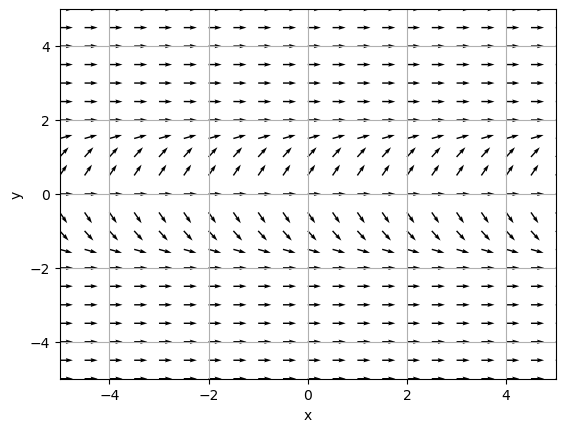

In [70]:
X,Y=np.meshgrid(np.linspace(-5,5,21), np.linspace(-5,5,21))

U = 1.0
V = (np.exp(-Y**2)*(4*Y-Y**3)) #f(x,y)

N = np.sqrt(U ** 2 + V ** 2)#Normalizamos los vectores
U = U / N
V = V / N

plt.quiver(X, Y, U, V) #graficamos los vectores con origen en (x,y) y término (u,v)
plt.xlim([-5, 5]) #limites en eje x
plt.ylim([-5, 5]) #limites en eje y

plt.xlabel('x') #etiqueta eje x
plt.ylabel('y') #etiqueta eje y
plt.grid()# para establecer red en la región

# 2 nodo
# 0 repulsor 
# -2 nodo

In [71]:
x = sp.Symbol('x', real=True )
y = sp.Function('y')

Eq = ((4*y(x)-y(x)**3))

sp.dsolve(y(x).diff(x) - Eq, ics={y(0):1.2})

              ___________________________     
             ╱            -1               4⋅x
y(x) = 2⋅   ╱  ───────────────────────── ⋅ℯ   
           ╱      8⋅x                         
         ╲╱    - ℯ    - 1.77777777777778      

2.- La carga Q(t) en un capacitor sigue:
dQ/dt=  (10-Q^2)/(Q^2+1)-0.2Q
	Para Q(0) = 0, implemente:
	Método de Euler con h = 0.1 (200 pasos)
	RK4 con h = 0.4 (50 pasos)

	Resuelva la EDO usando Python

	Una vez resuelta calcule el error absoluto, y el porcentaje de error, ¿Fue una buena aproximación, cual estuvo más cerca, y por qué?


In [72]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_latex='mathjax') 

x = sp.Symbol('x', real=True)
y = sp.Function('y')



In [73]:
import matplotlib.pyplot as plt
import numpy as np

def Euler(f,x0,xn,y0,n): #nuestra función se llama Euler y sus datos de entrada son f,x0,xn,y0,n
    X = np.linspace(x0,xn,n+1)         
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0
    h=(xn-x0)/n
    for i in range(n):
        Y[i+1] = Y[i] + h*f(X[i],Y[i])
    return Y

In [74]:
def RK4(f, x0, xn, y0, n):
    X = np.linspace(x0,xn,n+1)
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0
    h = (xn-x0)/n     
    for i in range(n):
        K1=f(X[i],Y[i]) 
        K2=f(X[i]+h/2,Y[i]+(h/2)*K1) 
        K3=f(X[i]+h/2,Y[i]+(h/2)*K2) 
        K4=f(X[i]+h,Y[i]+h*K3)
        Y[i+1] = Y[i] +(h/6)*(K1+2*K2+2*K3+K4)
    return Y

In [75]:
f = ((10 - y(x)**2)/ (y(x)**2 + 1)) - 0.2*y(x)
f

      2              
10 - y (x)           
────────── - 0.2⋅y(x)
 2                   
y (x) + 1            

In [76]:
#  h  = xn-x0/n
#  0.1 = xn-0 / 200
# 0.1*200 = xn
# xn = 20

In [77]:
def g(x,y): return ((10 - y**2)/ (y**2 + 1)) - 0.2*y

In [78]:
euler1 = Euler(g,0,20,0,200)[-1]
euler1

2.5139123550121605

In [79]:
RK4val = RK4(g, 0, 20, 0, 50)[-1]
RK4val

2.513912355001441

In [80]:
x = sp.Symbol('x', real=True )
y = sp.Function('y')

Eq = ((10 - y(x)**2)/ (y(x)**2 + 1)) - 0.2*y(x)

sol = sp.dsolve(y(x).diff(x) - Eq, ics={y(0):0})
sol

                                            -1.23223762300991⋅x
y(x) = 2.51391235501537 - 2.51391235501537⋅ℯ                   

In [81]:
solfinal = sol.rhs.subs(x,20)

In [82]:
np.abs((solfinal - euler1)/solfinal)*100

1.85361596626567e-9

In [83]:
np.abs((solfinal - RK4val)/solfinal)*100

1.42721186644941e-9